In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

In [26]:
with open('vectors.pkl', 'rb') as f:
    vectors = pickle.load(f)

with open('participants.pkl', 'rb') as f:
    participants = pickle.load(f)

non_normalized_df = pd.read_csv('non_normalized_data.csv')
non_normalized_df.set_index('id', inplace=True)

whole_df = pd.read_csv('preprocessed_data.csv')
whole_df.set_index('id', inplace=True)

In [27]:
target_variables = ['stflife', 'stfgov', 'stfedu']

In [28]:
distributions = {
    t: np.array([
        participants[p]["projections"][t]
        for p in participants.keys()
    ]) 
    for t in target_variables
}

In [29]:
def show_hist(sample):
    plt.figure(figsize=(10, 6))
    sns.histplot(sample, kde=False, bins=30) 
    plt.title('Histogram of the Sample')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [30]:
def show_density(sample, title='', show=False):
    # plt.figure(figsize=(5, 3))
    sns.kdeplot(sample, fill=True)
    # plt.title(f'Density Plot of the {title}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend(title)
    if show:
        plt.show()

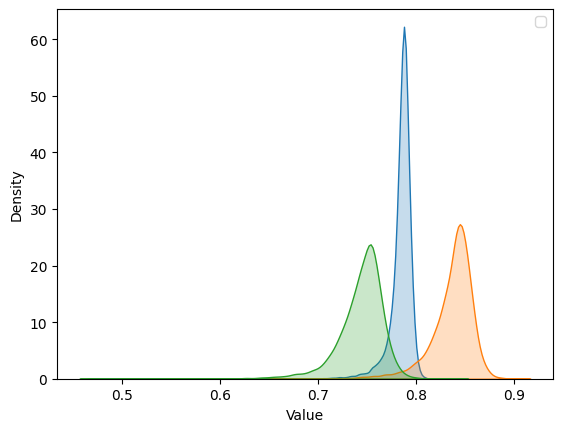

In [32]:
for t in target_variables: 
    show_density(distributions[t])

In [33]:
gold_distributions = {}
for target in target_variables:
    gold_distributions[target] = whole_df[~whole_df[target].isin([77, 88, 99])][target].to_numpy()

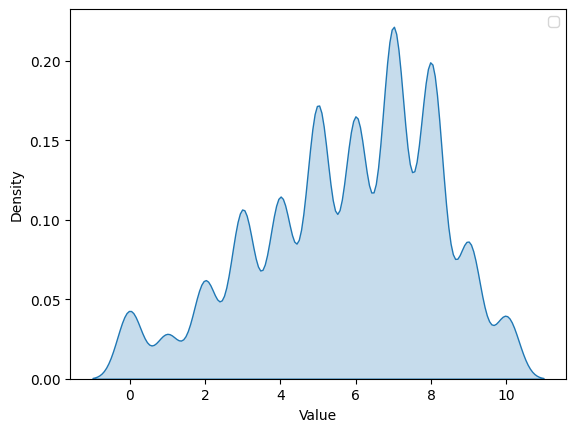

In [34]:
show_density(gold_distributions[t])

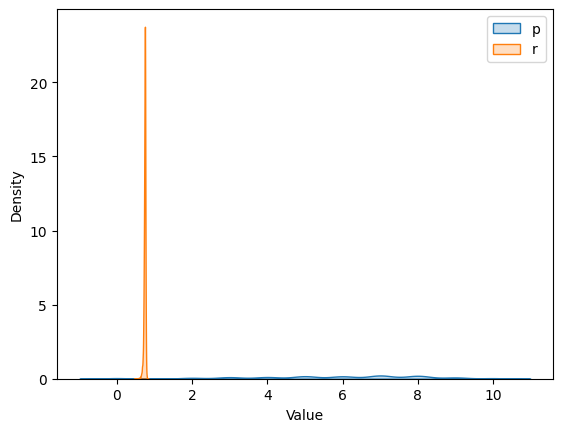

In [35]:
show_density(gold_distributions[t], title='gold')
show_density(distributions[t], title='pred')